Survival function and life expectancy
===============

# Assignment 3

Thomas Barks (964188), Sebastian Porras Garulo (853030) and Laura Farny (665536), April 6th, 2015.


This notebook shows how a simple python model can be calibrated to analyze life expectancy at birth in the Netherlands. We used data from The World Bank’s website in order to compare the life expectancy of an average Dutch individual with the results the Weibull survival function estimates. This function is explained in David L. Wilson’s paper ‘The analysis of survival (mortality) data: Fitting Gompertz, Weibull and logistic functions’ (1994).

### Question: 
Can we calibrate the Weibull survival function for the Netherlands? We would also like to know what is the probability of an average student living in the Netherlands living until 60 years from now?

#### Motivation:
As far as we know this has not been done for the Netherlands so it is interesting to see if the Weibull survival function actually works. Also, we would like to know our odds of being alive in 60 years from now if we stay in the Netherlands.

#### Method:
We have been able to find the Weibull survival function in David L. Wilson’s paper ‘The analysis of survival (mortality) data: Fitting Gompertz, Weibull and logistic functions’ (1994). Although it is about flies, we found another paper by Byung Mook Weon (2003) that claims that human survival curves could be described accurately by the Weibull survival function with the age-dependent shape parameter. We calibrate a model using the Weibull survival function using the life expectancy at birth in the Netherlands.

#### Answer:
Our conclusion is that we can calibrate the Weibull survival function. In addition we assume that the older a person gets the probability that this person lives 60 more years decreases.

### Main assumptions:

* We use the Weibull survival function explained in the paper by [Wilson (1994)](http://www.ncbi.nlm.nih.gov/pubmed/7934205)
* We take the life expectancy for the Netherlands (81 years) from the [World Bank](http://data.worldbank.org/indicator/SP.DYN.LE00.IN)







The life expectancy at birth is 81 years.

We use the following survival function:

$$\LARGE S(t)=e^{(-(t/a)^{g})}  \\$$


### Importing libraries:

In [16]:
from __future__ import division
from numpy import *
from operator import *
import matplotlib.pyplot as plt
from scipy import optimize, arange
from operator import add
#from openopt import GLP
from mpmath import findroot
from scipy import integrate
%matplotlib inline

For calibrating the parameter $a$, we need to define value of parameter $g$ and an initial guess for $a$


In [124]:
#We have parameters a and g
a0=90 #initial guess
g0=11.24 #given value

Then, we define a variable for Life Expectancy at birth for the Netherlands, which is 81 years. Also, we define the integer of survival function with parameter $a$ as a variable.

In [125]:
LEB=81 #Life expectancy at born
def survA(a):
    return integrate.quad(lambda t:exp(-(t/a)**g0), 0, 200)

Now, we can calibrate the model and look for the value of the parameter when Life Expectancy at birth is the same as Netherlands.

In [131]:
output = optimize.fsolve(lambda a: survA(a)[0]-LEB, a0)
print output
parameter_a=output

[ 84.73757092]


We find the value now for $a$, so we can now define the survival function with the real parameters and the Cumulative Distribution function. The intersection of both is the median life time of Dutch people.

In [127]:
def survival(t):
    return exp(-(t/parameter_a)**g0)

def CDF(t):  # Cumulative distribution function: 1-Survival
    return 1-survival(t)

So lets graph the functions to have an idea of where should this intersection be.

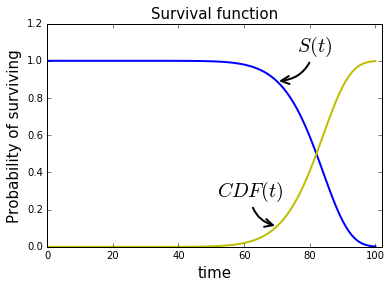

In [128]:
range_t = arange(0.0,101,1.0)


plt.clf()
plt.plot(range_t, survival(range_t),'-', color = 'b', linewidth = 2)
plt.plot(range_t, CDF(range_t),'-', color = 'y', linewidth = 2)
plt.title("Survival function",fontsize = 15)
plt.xlabel("time",fontsize = 15)
plt.ylabel("Probability of surviving",fontsize = 15,rotation = 90)
plt.ylim(0.0,1.2)
plt.xlim(0.0,102)

plt.annotate('$S(t)$', xy=(70,survival(70)),  xycoords='data',
              xytext=(20, 30), textcoords='offset points', size = 20,
              arrowprops=dict(arrowstyle="->", linewidth = 2,
                              connectionstyle="arc3,rad=-0.4"),
              )
plt.annotate('$CDF(t)$', xy=(70,CDF(70)),  xycoords='data',
              xytext=(-60, 30), textcoords='offset points', size = 20,
              arrowprops=dict(arrowstyle="->", linewidth = 2,
                              connectionstyle="arc3,rad=0.4"),
              )

plt.savefig('Survival function.png')

Now lets calculate value of $t$ at the intersection:

In [129]:
output = optimize.fsolve(lambda t: survival(t)-CDF(t), 80)
print output
MedLife=output # this is the median life time 

[ 82.01901976]


Therefore, the Median Life Time in Netherlands is 82 years old.

Let's look where it is in the graph and see if it's in the correct place:

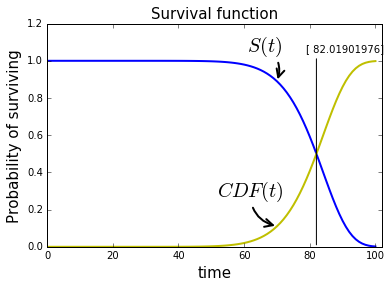

In [130]:
range_t = arange(0.0,101,1.0)


plt.clf()
plt.plot(range_t, survival(range_t),'-', color = 'b', linewidth = 2)
plt.plot(range_t, CDF(range_t),'-', color = 'y', linewidth = 2)
plt.title("Survival function",fontsize = 15)
plt.xlabel("time",fontsize = 15)
plt.ylabel("Probability of surviving",fontsize = 15,rotation = 90)
plt.ylim(0.0,1.2)
plt.xlim(0.0,102)

plt.annotate('$S(t)$', xy=(70,survival(70)),  xycoords='data',
              xytext=(-30, 30), textcoords='offset points', size = 20,
              arrowprops=dict(arrowstyle="->", linewidth = 2,
                              connectionstyle="arc3,rad=-0.4"),
              )
plt.annotate('$CDF(t)$', xy=(70,CDF(70)),  xycoords='data',
              xytext=(-60, 30), textcoords='offset points', size = 20,
              arrowprops=dict(arrowstyle="->", linewidth = 2,
                              connectionstyle="arc3,rad=0.4"),
              )
plt.annotate('', xy=(MedLife,0),  xycoords='data',
              xytext=(0, 190), textcoords='offset points', size = 20,
              arrowprops=dict(arrowstyle="-", linewidth = 1,
                              connectionstyle="arc3,rad=0"),
              )
plt.annotate(MedLife, xy=(MedLife,0),  xycoords='data',
              xytext=(-10, 195), textcoords='offset points', size = 10,
              )

plt.savefig('Survival function.png')

So, just to be sure, let's look for the Life expectancy at birth in the graph. This is the area under the survival function.

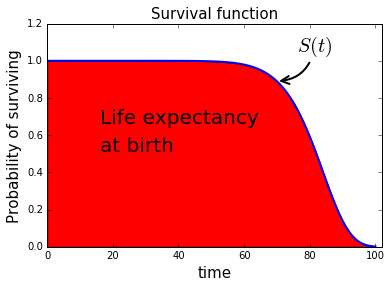

In [111]:
plt.clf()
plt.plot(range_t, survival(range_t),'-', color = 'b', linewidth = 2)
plt.title("Survival function",fontsize = 15)
plt.xlabel("time",fontsize = 15)
plt.ylabel("Probability of surviving",fontsize = 15,rotation = 90)
plt.ylim(0.0,1.2)
plt.xlim(0.0,102)

plt.annotate('$S(t)$', xy=(70,survival(70)),  xycoords='data',
              xytext=(20, 30), textcoords='offset points', size = 20,
              arrowprops=dict(arrowstyle="->", linewidth = 2,
                              connectionstyle="arc3,rad=-0.4"),
              )
plt.annotate('Life expectancy', xy=(10,.5),  xycoords='data',
              xytext=(20, 30), textcoords='offset points', size = 20,
              )
plt.annotate('at birth', xy=(10,.35),  xycoords='data',
              xytext=(20, 30), textcoords='offset points', size = 20,
              )
plt.fill_between(range_t, 0, survival(range_t), facecolor='r')

This is, as defined, the integral of the survival funtion, which is equal to the Life Expectancy at birth.

In [112]:
LEB0=integrate.quad(lambda t:survival(t), 0, 200)
print LEB0[0]

81.0


Now we calculate the probability of Tom, age 22, being alive 60 years from now:

$$P(TomAliveAt82)=P(t>82 | t>22) = P(82>t) / P(t>22) = S(82) / S(22)$$

In [120]:
print survival(82)/survival(22)

[ 0.50090322]


Now we calculate the probability of Laura, age 25, being alive 60 years from now:


$$P(LauraAliveAt85)=P(t>85|t>25)=P(85>t)/P(t>25)=S(85)/S(25)$$

In [132]:
print survival(85)/survival(25)

[ 0.35509639]


Now we calculate the probability of Sebastian, age 26, being alive 60 years from now:

$$P(SebastianAliveAt86)=P(t>86|t>26)=P(86>t)/P(t>26)=S(86)/S(26)$$

In [123]:
print survival(86)/survival(26)

[ 0.30702361]


### Conclusion
To conclude, we have calibrated the Weibull survival function for the Netherlands. Furthermore, we have used the model to calculate the probabilities of survival 60 years from now for ages 22, 25 and 26. We find that with higher age comes a lower probability, which is intuitive. This shows that the model is a good estimator.